In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [11]:
df = pd.read_csv('DataSets//mall customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [12]:
df.drop(['CustomerID','Gender'], axis=1, inplace=True)
df.head()

Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

In [13]:
df.rename(columns={'Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)
df.head()

age  income  score
0   19      15     39
1   21      15     81
2   20      16      6
3   23      16     77
4   31      17     40

In [14]:
df.shape

(200, 3)

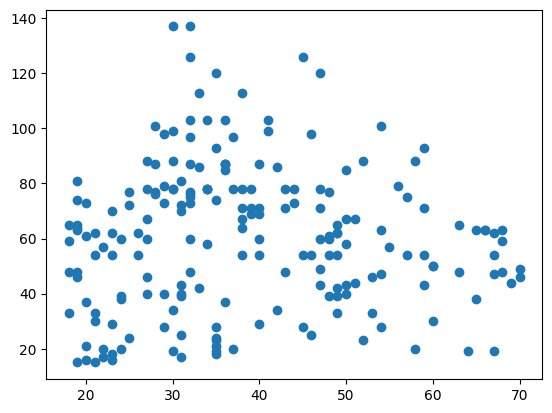

In [15]:
plt.scatter(df.age, df.income)

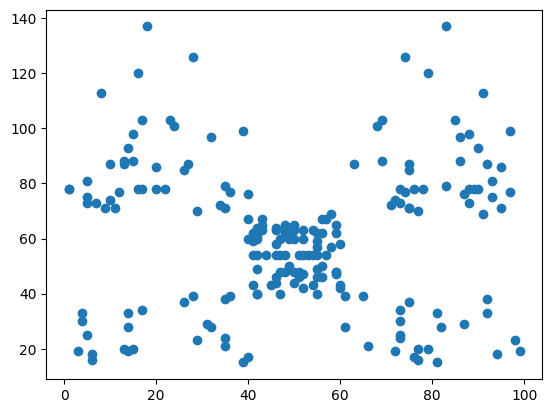

In [16]:
plt.scatter(df.score, df.income)

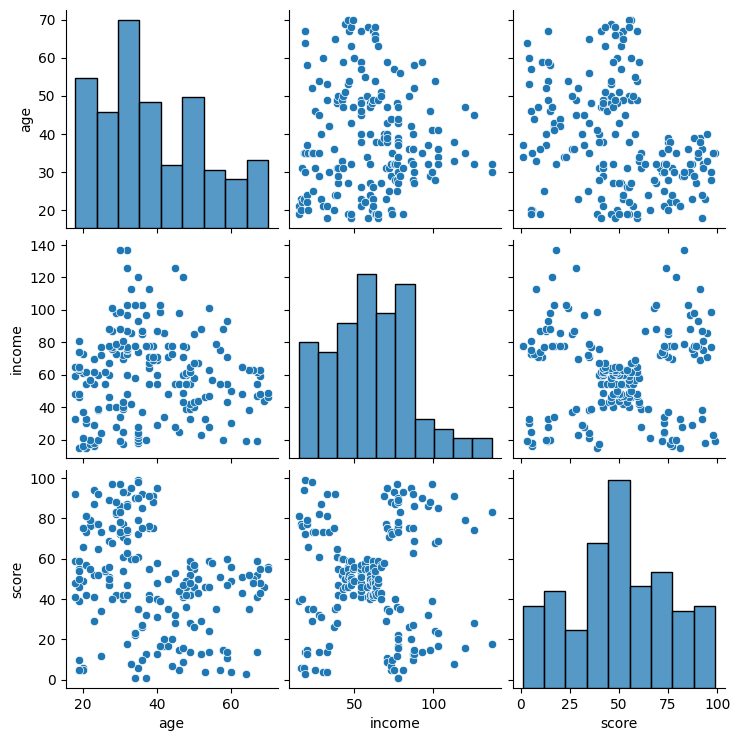

In [17]:
import seaborn as sns
sns.pairplot(df[['age','income','score']])
plt.savefig('image.png') #save image

# K-MEANS CLUSTER

Text(0.5, 1.0, 'Income & Score Plot of C|utomres')

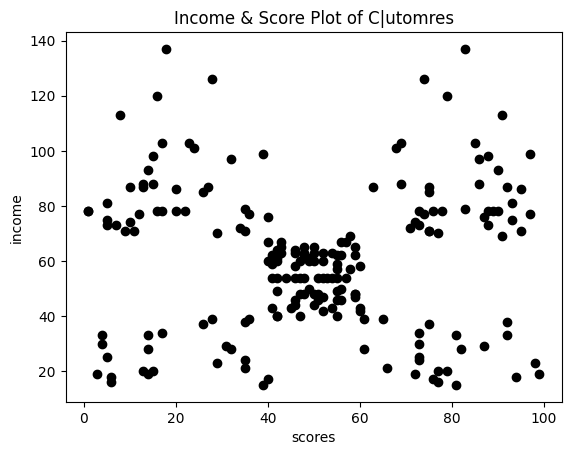

In [18]:
plt.scatter(df.score, df.income, color='black')
plt.xlabel('scores')
plt.ylabel('income')
plt.title('Income & Score Plot of C|utomres')

In [20]:
from sklearn.cluster import KMeans

km = KMeans() #n_clusters=8
km.fit(df[['score', 'income']]) #fit_predict()

KMeans()

In [21]:
df['Group1'] = km.predict(df[['score', 'income']])

In [22]:
df.head()

age  income  score  Group1
0   19      15     39       4
1   21      15     81       3
2   20      16      6       4
3   23      16     77       3
4   31      17     40       4

In [26]:
centroid = km.cluster_centers_
centroid

array([[ 80.8       ,  76.96      ],
       [ 17.42857143,  78.89285714],
       [ 50.02564103,  54.61538462],
       [ 79.36363636,  25.72727273],
       [ 20.91304348,  26.30434783],
       [ 78.66666667, 127.66666667],
       [ 22.        , 109.7       ],
       [ 86.09090909,  97.09090909]])

In [27]:
#seperating different clusters for plotting
df0 = df[df.Group1 == 0]
df1 = df[df.Group1 == 1]
df2 = df[df.Group1 == 2]
df3 = df[df.Group1 == 3]
df4 = df[df.Group1 == 4]
df5 = df[df.Group1 == 5]
df6 = df[df.Group1 == 6]
df7 = df[df.Group1 == 7]

In [28]:
#sample of group 0
df0.head()

age  income  score  Group1
123   39      69     91       0
125   31      70     77       0
127   40      71     95       0
129   38      71     75       0
131   39      71     75       0

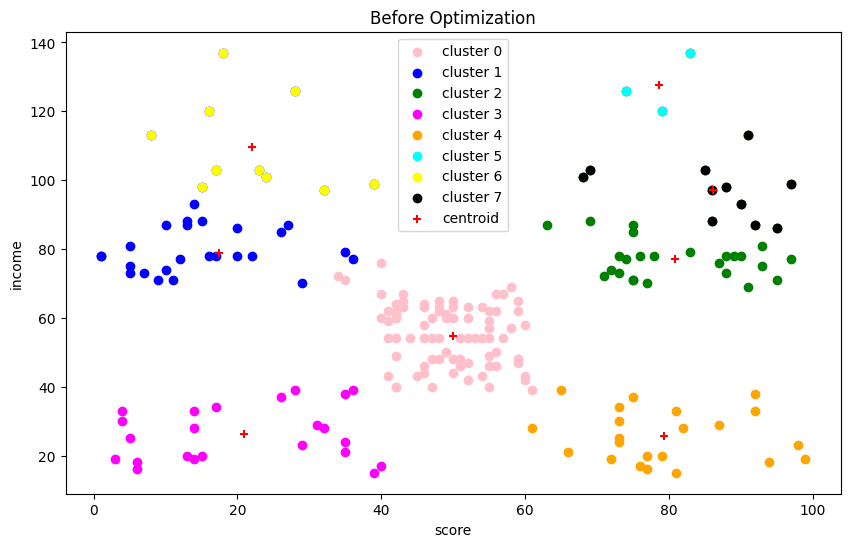

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(df0.score, df0.income, color='pink', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='magenta', label='cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='cluster 4')
plt.scatter(df5.score, df5.income, color='cyan', label='cluster 5')
plt.scatter(df6.score, df6.income, color='yellow', label='cluster 6')
plt.scatter(df7.score, df7.income, color='black', label='cluster 7')

plt.scatter(centroid[:, 0], centroid[:,1], color='red', marker = '+', label='centroid')

plt.xlabel('score')
plt.ylabel('income')
plt.title('Before Optimization')

plt.legend()

# Optimizing K-MEANS

In [58]:
wcss = []
cluster = range(1,15)

for k in cluster:
    km2 = KMeans(n_clusters = k)
    km2.fit(df[['score', 'income']])
    wcss.append(km2.inertia_)

In [59]:
wcss

[269981.28,
 183069.17582751293,
 106348.37306211119,
 73880.64496247195,
 66790.25561457992,
 37271.88623658949,
 31616.50544361178,
 28437.45732804018,
 23202.431658732043,
 21522.708705395115,
 17872.838154158504,
 16692.810229524657,
 17360.47976356976,
 14273.779929420172]

Text(0, 0.5, 'WCSS')

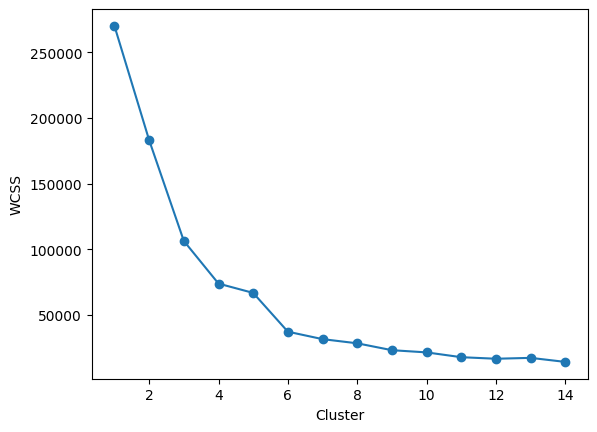

In [60]:
plt.plot(range(1,15), wcss, marker = 'o')
plt.xlabel('Cluster')
plt.ylabel('WCSS')

In [61]:
pip install kneed

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



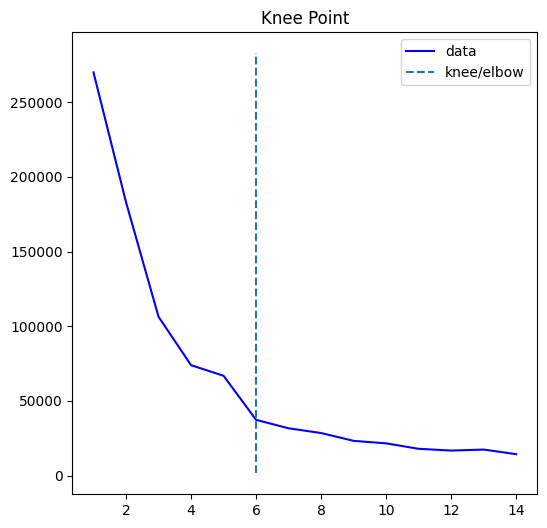

In [62]:
from kneed import KneeLocator

kn = KneeLocator(cluster, wcss, direction='decreasing', curve='convex', )
kn.plot_knee()

In [63]:
kn.knee

np.int64(6)

# After Optimizing

In [64]:
km = KMeans(n_clusters=kn.knee)
df['Group2'] = km.fit_predict(df[['score', 'income']])
df.head()

age  income  score  Group1  Group2
0   19      15     39       4       3
1   21      15     81       3       4
2   20      16      6       4       3
3   23      16     77       3       4
4   31      17     40       4       3

In [65]:
cen = km.cluster_centers_
cen

array([[ 17.11428571,  88.2       ],
       [ 49.51851852,  55.2962963 ],
       [ 82.17241379,  78.55172414],
       [ 20.91304348,  26.30434783],
       [ 79.36363636,  25.72727273],
       [ 82.        , 109.7       ]])

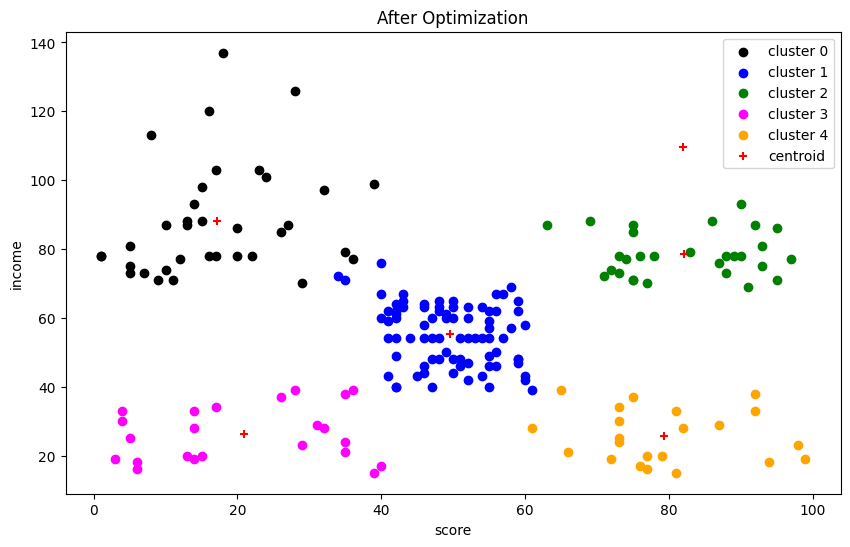

In [69]:
# Splittintg into clusters for plotting
df0 = df[df.Group2 == 0]
df1 = df[df.Group2 == 1]
df2 = df[df.Group2 == 2]
df3 = df[df.Group2 == 3]
df4 = df[df.Group2 == 4]

#plotting
plt.figure(figsize=(10,6))
plt.scatter(df0.score, df0.income, color='black', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='magenta', label='cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='cluster 4')

plt.scatter(cen[:, 0], cen[:,1], color='red', marker = '+', label='centroid')
plt.xlabel('score')
plt.ylabel('income')
plt.title('After Optimization')

plt.legend()